# 12 Months Sale Project

In [228]:
# importing modules

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

#### All the months are in separate CSV files 

#### first I will make them one year csv file and read them all thogether

In [2]:
# Sales of whole year

all_months = [month for month in os.listdir('./Sales_Data/')]

All_Months = pd.DataFrame()

for file in all_months:
    dff = pd.read_csv("./Sales_Data/" + file)
    All_Months = pd.concat([All_Months,dff])
    
All_Months.to_csv("Sales_of_whole_year", index=False)  

In [11]:
# reading the Whole year

df = pd.read_csv("Sales_of_whole_year")

In [12]:
# getting information of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Cleaning Data

In [15]:
# now i have mutiple column rows where the months end
# I will make them None values and will delete them

df = df.replace(["Order ID","Product","Quantity Ordered","Price Each","Order Date","Purchase Address"],np.nan)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [17]:
# changing columns type

df["Order ID"] = df["Order ID"].astype(int)
df["Price Each"] = df["Price Each"].astype(float)
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)

In [18]:
# looking for the Shape of our data (rows , columns)

df.shape

(185950, 6)

In [22]:
# adding date column (date)

df["date"] = df["Order Date"].astype(str).str[:8]
df["date"] = pd.to_datetime(df["date"])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",2019-07-26
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",2019-07-05
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",2019-07-29
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",2019-07-28
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",2019-07-31


## What was the best month for sells?, How much the company sold that month ?

In [24]:
# i want to sort my data with date

df.sort_values(by="date",inplace=True)

In [30]:
# adding columns ( total ) Price Each * Quantity Ordered

df["total"] = df["Price Each"] * df["Quantity Ordered"]

In [58]:
# now i want to use this clean sorted date as index
# and i want to see every months total of sells

df.index = df["date"]
all_months_sells = df.groupby(by=[df.index.month])["total"].sum()
all_months_sells

date
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: total, dtype: float64

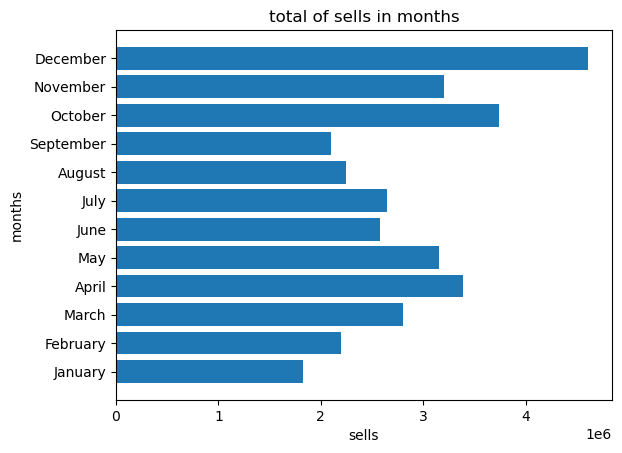

In [65]:
# let's visualize it with a vertical bar chart

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

all_months_sells.index = months
all_months_sells

plt.barh(months,all_months_sells)


plt.title("total of sells in months")
plt.xlabel("sells")
plt.ylabel("months")

plt.show()

## what city had the highest sales ?

In [123]:
# creating the city column

df["city"] = df["Purchase Address"].apply(lambda x : x.split(",")[1]+" ("+ x.split(",")[2].split(" ")[1]+")")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,total,city
date,,,,,,,,,
2019-01-01,142290,Apple Airpods Headphones,1,150.00,01/01/19 20:54,"392 Sunset St, Atlanta, GA 30301",2019-01-01,150.00,Atlanta (GA)
2019-01-01,149509,ThinkPad Laptop,1,999.99,01/01/19 14:04,"493 Dogwood St, Seattle, WA 98101",2019-01-01,999.99,Seattle (WA)
2019-01-01,149524,AA Batteries (4-pack),1,3.84,01/01/19 12:28,"72 Main St, Portland, OR 97035",2019-01-01,3.84,Portland (OR)
2019-01-01,144368,Apple Airpods Headphones,1,150.00,01/01/19 17:17,"249 8th St, San Francisco, CA 94016",2019-01-01,150.00,San Francisco (CA)
2019-01-01,149546,AA Batteries (4-pack),1,3.84,01/01/19 17:57,"223 Jefferson St, Boston, MA 02215",2019-01-01,3.84,Boston (MA)


In [124]:
# let's see howmany sells each city had in the past year

df["city"].value_counts()

 San Francisco (CA)    44732
 Los Angeles (CA)      29605
 New York City (NY)    24876
 Boston (MA)           19934
 Atlanta (GA)          14881
 Dallas (TX)           14820
 Seattle (WA)          14732
 Portland (OR)         10010
 Austin (TX)            9905
 Portland (ME)          2455
Name: city, dtype: int64

In [137]:
# let's see the total sells of each city in the past year

new_df = df.groupby(by=["city"]).sum()

In [170]:
# let's sort the data

new_df.sort_values(by="total",ascending=True,inplace=True)
new_df

,Order ID,Quantity Ordered,Price Each,total
city,,,,
Portland (ME),563266345,2750,447189.25,449758.27
Austin (TX),2280982185,11153,1809873.61,1819581.75
Portland (OR),2305594747,11303,1860558.22,1870732.34
Seattle (WA),3406693974,16553,2733296.01,2747755.48
Dallas (TX),3415643578,16730,2752627.82,2767975.40
Atlanta (GA),3423838407,16602,2779908.20,2795498.58
Boston (MA),4598265261,22528,3637409.77,3661642.01
New York City (NY),5736333884,27932,4635370.83,4664317.43
Los Angeles (CA),6811084693,33289,5421435.23,5452570.80


In [171]:
new_df.index

Index([' Portland (ME)', ' Austin (TX)', ' Portland (OR)', ' Seattle (WA)',
       ' Dallas (TX)', ' Atlanta (GA)', ' Boston (MA)', ' New York City (NY)',
       ' Los Angeles (CA)', ' San Francisco (CA)'],
      dtype='object', name='city')

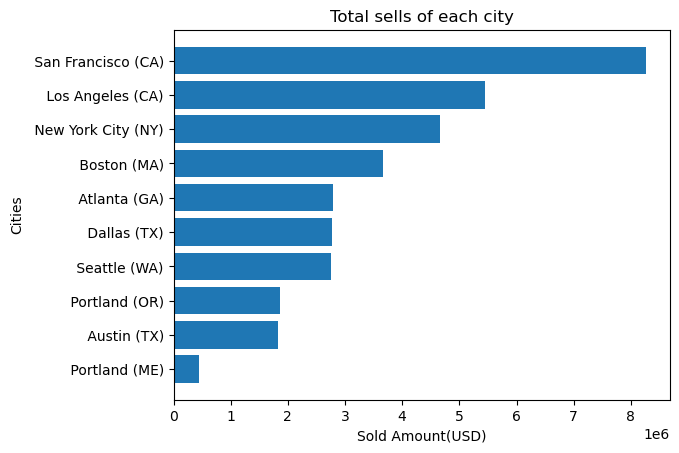

In [247]:
# let's visualize it with a vertical bar chart

plt.barh(new_df.index,new_df["total"])
plt.title("Total sells of each city")
plt.xlabel("Sold Amount(USD)")
plt.ylabel("Cities")

plt.show()

## what time should we display advertisements to maximize likelihood of customer buying our products?

In [182]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [184]:
df["hour"] = df["Order Date"].dt.hour

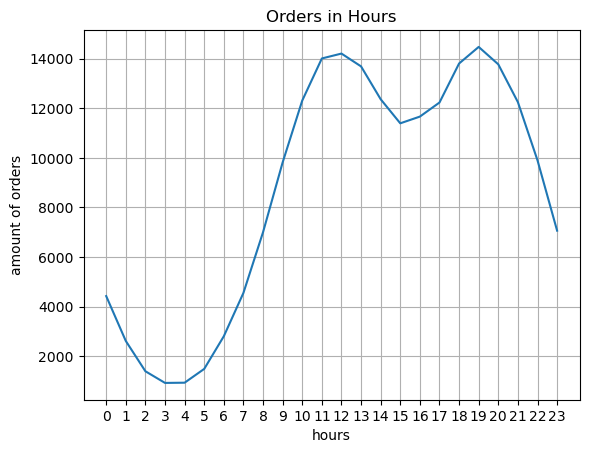

In [199]:
#  let's visualize it with a lineplot

hours = [hour for hour,df in df.groupby("hour")]
plt.plot(hours,df.groupby(df["hour"])["Quantity Ordered"].sum())
plt.xticks(hours)
plt.grid()
plt.title("Orders in Hours")
plt.xlabel("hours")
plt.ylabel("amount of orders")

plt.show()

# best time is around 11 AM or 7PM(19) 

In [185]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,total,city,hour
date,,,,,,,,,,
2019-01-01,142290,Apple Airpods Headphones,1,150.00,2019-01-01 20:54:00,"392 Sunset St, Atlanta, GA 30301",2019-01-01,150.00,Atlanta (GA),20
2019-01-01,149509,ThinkPad Laptop,1,999.99,2019-01-01 14:04:00,"493 Dogwood St, Seattle, WA 98101",2019-01-01,999.99,Seattle (WA),14
2019-01-01,149524,AA Batteries (4-pack),1,3.84,2019-01-01 12:28:00,"72 Main St, Portland, OR 97035",2019-01-01,3.84,Portland (OR),12
2019-01-01,144368,Apple Airpods Headphones,1,150.00,2019-01-01 17:17:00,"249 8th St, San Francisco, CA 94016",2019-01-01,150.00,San Francisco (CA),17
2019-01-01,149546,AA Batteries (4-pack),1,3.84,2019-01-01 17:57:00,"223 Jefferson St, Boston, MA 02215",2019-01-01,3.84,Boston (MA),17


## What are the 10 Products most often sold together?

In [222]:
# creating a new dataframe with all duplicates in Order ID column
# and creating the new column to check for most together solds ( grouped )

dup = df[df["Order ID"].duplicated(keep=False)]
dup["grouped"] = dup.groupby(["Order ID"])["Product"].transform(lambda x: ",".join(x))
dup.head()

/tmp/ipykernel_3021/3279686172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup["grouped"] = dup.groupby(["Order ID"])["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,total,city,hour,grouped
date,,,,,,,,,,,
2019-01-01,149546,AA Batteries (4-pack),1,3.84,2019-01-01 17:57:00,"223 Jefferson St, Boston, MA 02215",2019-01-01,3.84,Boston (MA),17,"AA Batteries (4-pack),Bose SoundSport Headphones"
2019-01-01,149546,Bose SoundSport Headphones,1,99.99,2019-01-01 17:57:00,"223 Jefferson St, Boston, MA 02215",2019-01-01,99.99,Boston (MA),17,"AA Batteries (4-pack),Bose SoundSport Headphones"
2019-01-01,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",2019-01-01,11.99,New York City (NY),7,"Wired Headphones,iPhone"
2019-01-01,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",2019-01-01,700.00,New York City (NY),7,"Wired Headphones,iPhone"
2019-01-01,144679,USB-C Charging Cable,1,11.95,2019-01-01 12:51:00,"984 Lakeview St, San Francisco, CA 94016",2019-01-01,11.95,San Francisco (CA),12,"USB-C Charging Cable,Google Phone"


In [225]:
# delteing duplicates from Order ID and grouped columns from dataframe we just create

together_solds = dup[["Order ID","grouped"]].drop_duplicates()
together_solds.head()

,Order ID,grouped
date,,
2019-01-01,149546,"AA Batteries (4-pack),Bose SoundSport Headphones"
2019-01-01,144804,"Wired Headphones,iPhone"
2019-01-01,144679,"USB-C Charging Cable,Google Phone"
2019-01-01,143738,"Lightning Charging Cable,iPhone"
2019-01-01,141789,"Google Phone,USB-C Charging Cable"


In [231]:
# using Counter and Combination in a Groupby Method to create a list
# of 2 highest sold product and count them with no duplicate

count = Counter()

for row in together_solds["grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)
# The result is below

[(('Lightning Charging Cable', 'iPhone'), 508),
 (('iPhone', 'Lightning Charging Cable'), 507),
 (('Google Phone', 'USB-C Charging Cable'), 500),
 (('USB-C Charging Cable', 'Google Phone'), 499),
 (('Wired Headphones', 'iPhone'), 239),
 (('Google Phone', 'Wired Headphones'), 231),
 (('iPhone', 'Wired Headphones'), 223),
 (('iPhone', 'Apple Airpods Headphones'), 198),
 (('Wired Headphones', 'Google Phone'), 192),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 185)]

## What product sold the most?

In [232]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,total,city,hour
date,,,,,,,,,,
2019-01-01,142290,Apple Airpods Headphones,1,150.00,2019-01-01 20:54:00,"392 Sunset St, Atlanta, GA 30301",2019-01-01,150.00,Atlanta (GA),20
2019-01-01,149509,ThinkPad Laptop,1,999.99,2019-01-01 14:04:00,"493 Dogwood St, Seattle, WA 98101",2019-01-01,999.99,Seattle (WA),14
2019-01-01,149524,AA Batteries (4-pack),1,3.84,2019-01-01 12:28:00,"72 Main St, Portland, OR 97035",2019-01-01,3.84,Portland (OR),12
2019-01-01,144368,Apple Airpods Headphones,1,150.00,2019-01-01 17:17:00,"249 8th St, San Francisco, CA 94016",2019-01-01,150.00,San Francisco (CA),17
2019-01-01,149546,AA Batteries (4-pack),1,3.84,2019-01-01 17:57:00,"223 Jefferson St, Boston, MA 02215",2019-01-01,3.84,Boston (MA),17


In [238]:
# sorting values in sells of products for better visualization and accuracy

sold_p = df.groupby(["Product"])["Quantity Ordered"].sum().sort_values()
sold_p

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int64

In [240]:
sold_p.index

Index(['LG Dryer', 'LG Washing Machine', 'Vareebadd Phone', '20in Monitor',
       'ThinkPad Laptop', 'Macbook Pro Laptop', 'Flatscreen TV',
       'Google Phone', '34in Ultrawide Monitor', '27in 4K Gaming Monitor',
       'iPhone', '27in FHD Monitor', 'Bose SoundSport Headphones',
       'Apple Airpods Headphones', 'Wired Headphones',
       'Lightning Charging Cable', 'USB-C Charging Cable',
       'AA Batteries (4-pack)', 'AAA Batteries (4-pack)'],
      dtype='object', name='Product')

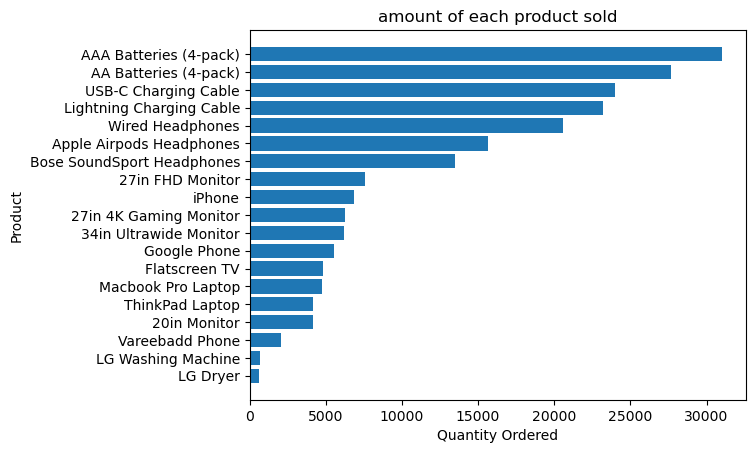

In [243]:
# let's visualize it with vertical bar chart

plt.barh(sold_p.index,sold_p)
plt.title("amount of each product sold")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")

plt.show()